# PREDICTION USING SUPERVISED ML
   BY  ANJALI SINGH

PREDICT THE PERCENTAGE OF MARKS OF A STUDENT BASED ON THE NUMBER OF STUDY HOURS
THIS IS SIMPLE LINEAR , REGRESSION TASK AS IT INVOLVE JUST TWO VARIABLES

# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data from a file

In [6]:
data= pd.read_csv("http://bit.ly/w-data")
data.head()                                             #head reads first 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.head(20)                        #to read first 20 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
# to see the total number of columns present in the dataset
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [10]:
data.describe()                  #this describes the whole dataaset->> its mean,standard deviation etc.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
#to find out the dimensions of the dataset
data.shape


(25, 2)

# plotting the distribution

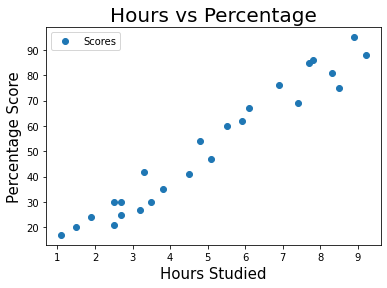

In [21]:
data.plot(x='Hours', y='Scores', style='o')  

plt.title('Hours vs Percentage',fontsize = 20)
plt.xlabel('Hours Studied',fontsize = 15)                        

plt.ylabel('Percentage Score', fontsize = 15)  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [22]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [27]:
X_train.shape

(20, 1)

In [29]:
y_train.shape

(20,)

In [30]:
X_test.shape

(5, 1)

In [31]:
y_test.shape

(5,)

# Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train,y_train)
print("Training Complete")


Training Complete


In [35]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_


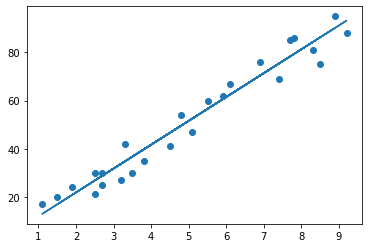

In [36]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [39]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [49]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print(f"No of Hours = {hours}")
print(f"Predicted Score ={own_pred[0]}")

No of Hours = [[9.25]]
Predicted Score =93.69173248737538


# Evaluating the model
The final step is to evaluate the performance of algorithm.
This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [50]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.18385989900298
